In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [2]:
import requests
import json
from datetime import date as Date, timedelta
from pathlib import Path
from IPython.display import display
from ipywidgets import FloatProgress, HTML
import munch

### Basic Wunderground CSV API

In [26]:
# From this url: http://www.wunderground.com/history/airport/KNYC/2013/1/1/MonthlyHistory.html?req_city=New%20York&req_state=NY&req_statename=New%20York&reqdb.zip=10001&reqdb.magic=1&reqdb.wmo=99999&MR=1
# At the bottom, there is a "comma-delimited file" option

csv_url='http://www.wunderground.com/history/airport/KNYC/2013/{month}/1/MonthlyHistory.html?req_city=New%20York&req_state=NY&req_statename=New%20York&reqdb.zip=10001&reqdb.magic=1&format=1'

#req = requests.get()
data = []
for month in range(1, 13):
    datum = pandas.read_csv(csv_url.format(month=month), skipinitialspace=True, na_values={'PrecipitationIn':'T'})
    key = 'EST'
    if key not in datum.columns:
        key = 'EDT'
    datum['date'] = pandas.to_datetime(datum[key])
    datum.set_index('date', inplace=True)
    data.append(datum)
data = pandas.concat(data)

In [34]:
events = data.loc[:, 'Events']
rained = pandas.Series(['Rain' in str(ev) for ev in events])
snowed = pandas.Series(['Snow' in str(ev) for ev in events])

In [35]:
sum(rained), sum(snowed), sum(rained | snowed), sum(rained & snowed)

(112, 25, 128, 9)

In [41]:
data.to_csv('weather/daily2013.csv')

In [56]:
data2 = pandas.read_csv('weather/daily2013.csv', index_col=0, parse_dates=True)

In [57]:
data2

,CloudCover,EDT,EST,Events,Max Dew PointF,Max Gust SpeedMPH,Max Humidity,Max Sea Level PressureIn,Max TemperatureF,Max VisibilityMiles,...,Mean VisibilityMiles,Mean Wind SpeedMPH,MeanDew PointF,Min DewpointF,Min Humidity,Min Sea Level PressureIn,Min TemperatureF,Min VisibilityMiles,PrecipitationIn,WindDirDegrees<br />
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,5,NaN,2013-1-1,NaN,27,26,64,30.01,40,10,...,10,7,22,9,44,29.84,26,10,0.00,283<br />
2013-01-02,0,NaN,2013-1-2,NaN,15,22,57,30.17,33,10,...,10,6,11,9,39,30.01,22,10,0.00,299<br />
2013-01-03,2,NaN,2013-1-3,NaN,17,20,68,30.19,32,10,...,10,5,14,12,43,30.06,24,10,0.00,272<br />
2013-01-04,3,NaN,2013-1-4,NaN,21,28,63,30.08,37,10,...,10,8,19,18,48,29.95,30,10,0.00,268<br />
2013-01-05,1,NaN,2013-1-5,NaN,21,26,56,30.26,42,10,...,10,7,19,16,39,30.02,32,10,0.00,285<br />
2013-01-06,5,NaN,2013-1-6,NaN,31,20,89,30.21,46,10,...,8,7,27,21,45,29.97,34,5,NaN,257<br />
2013-01-07,0,NaN,2013-1-7,NaN,27,25,64,30.39,45,10,...,10,5,23,18,36,30.06,37,10,0.00,291<br />
2013-01-08,0,NaN,2013-1-8,NaN,30,25,70,30.43,48,10,...,9,7,27,24,48,30.34,35,7,0.00,251<br />
2013-01-09,3,NaN,2013-1-9,NaN,36,22,76,30.38,49,10,...,8,4,32,27,54,30.14,39,4,0.00,265<br />


In [63]:
data['CloudCover']

date
2013-01-01    5
2013-01-02    0
2013-01-03    2
2013-01-04    3
2013-01-05    1
2013-01-06    5
2013-01-07    0
2013-01-08    0
2013-01-09    3
2013-01-10    0
2013-01-11    5
2013-01-12    8
2013-01-13    8
2013-01-14    7
2013-01-15    8
2013-01-16    7
2013-01-17    3
2013-01-18    3
2013-01-19    0
2013-01-20    0
2013-01-21    5
2013-01-22    2
2013-01-23    2
2013-01-24    1
2013-01-25    4
2013-01-26    0
2013-01-27    0
2013-01-28    7
2013-01-29    8
2013-01-30    7
             ..
2013-12-02    4
2013-12-03    1
2013-12-04    4
2013-12-05    8
2013-12-06    8
2013-12-07    4
2013-12-08    6
2013-12-09    7
2013-12-10    5
2013-12-11    0
2013-12-12    1
2013-12-13    2
2013-12-14    7
2013-12-15    7
2013-12-16    1
2013-12-17    8
2013-12-18    3
2013-12-19    0
2013-12-20    2
2013-12-21    1
2013-12-22    5
2013-12-23    8
2013-12-24    3
2013-12-25    1
2013-12-26    5
2013-12-27    2
2013-12-28    1
2013-12-29    6
2013-12-30    3
2013-12-31    3
Name: CloudCover, d

In [95]:
ser=data2[col]
ser[ix].isnull()

date
2013-01-01    True
2013-01-02    True
2013-01-03    True
2013-01-04    True
2013-01-05    True
2013-01-06    True
2013-01-07    True
2013-01-08    True
2013-01-09    True
2013-01-10    True
2013-01-11    True
2013-01-12    True
2013-01-13    True
2013-01-14    True
2013-01-15    True
2013-01-16    True
2013-01-17    True
2013-01-18    True
2013-01-19    True
2013-01-20    True
2013-01-21    True
2013-01-22    True
2013-01-23    True
2013-01-24    True
2013-01-25    True
2013-01-26    True
2013-01-27    True
2013-01-28    True
2013-01-29    True
2013-01-30    True
              ... 
2013-12-02    True
2013-12-03    True
2013-12-04    True
2013-12-05    True
2013-12-06    True
2013-12-07    True
2013-12-08    True
2013-12-09    True
2013-12-10    True
2013-12-11    True
2013-12-12    True
2013-12-13    True
2013-12-14    True
2013-12-15    True
2013-12-16    True
2013-12-17    True
2013-12-18    True
2013-12-19    True
2013-12-20    True
2013-12-21    True
2013-12-22    True
2013-12

In [127]:
data[col][:1] == data2[col][:1], ix[:1]

(date
 2013-01-01    True
 Freq: D, Name: CloudCover, dtype: bool, date
 2013-01-01    True
 Name: CloudCover, dtype: bool)

In [131]:
for col in data2.columns:
    null1 = data[col].isnull()
    null2 = data2[col].isnull()
    nulls = null1 & null2
    ix = ~((data2[col] == data[col]) | nulls)
    if not any(ix): continue
    print(col)
    print('    ',data2[col][ix][:10], data[col][ix][:10])

In [14]:
pandas.DataFrame.from_dict(dict(rained=rained, snowed=snowed))

,rained,snowed
day,,
2013-01-01,False,False
2013-01-02,False,False
2013-01-03,False,False
2013-01-04,False,False
2013-01-05,False,False
2013-01-06,False,False
2013-01-07,False,False
2013-01-08,False,False
2013-01-09,False,False


### Full Weather Underground API

In [110]:
with open('weatherkey.txt') as f:
    key = f.read().strip()

In [112]:
url = 'http://api.wunderground.com/api/{key}/history_{date}/q/NY/New_York.json'
progress = FloatProgress(max=364, description=' ')
display(progress)
for n in range(365):
    progress.value = n
    date = Date(2013, 1, 1) + timedelta(n)
    date_ymd = date.strftime('%Y%m%d')
    fname = Path('weather') / 'history_{date}'.format(date=date_ymd)
    if fname.exists():
        continue
    date_url = url.format(key=key, date=date_ymd)
    req = requests.get(date_url)
    if not req.ok:
        break
    with fname.open('wb') as fd:
        fd.write(req.content)
    progress.description = '%4d / %4d' % (n, 364)
progress.description = 'Done.'
progress.bar_style = 'success'

In [126]:
observed = []
for n in range(365):
    date = Date(2013, 1, 1) + timedelta(n)
    date_ymd = date.strftime('%Y%m%d')
    with (Path('weather') / 'history_{date}'.format(date=date_ymd)).open('r') as fd:
        dat = json.load(fd)
    obj = munch.munchify(dat)
    rain_frac = []
    for obs in obj.history.observations:
        rain = float(obs.rain)
        snow = float(obs.snow)
        precip = rain or snow
        rain_frac.append(precip)
    observed.append(np.mean(rain_frac))
observed = np.asarray(observed)

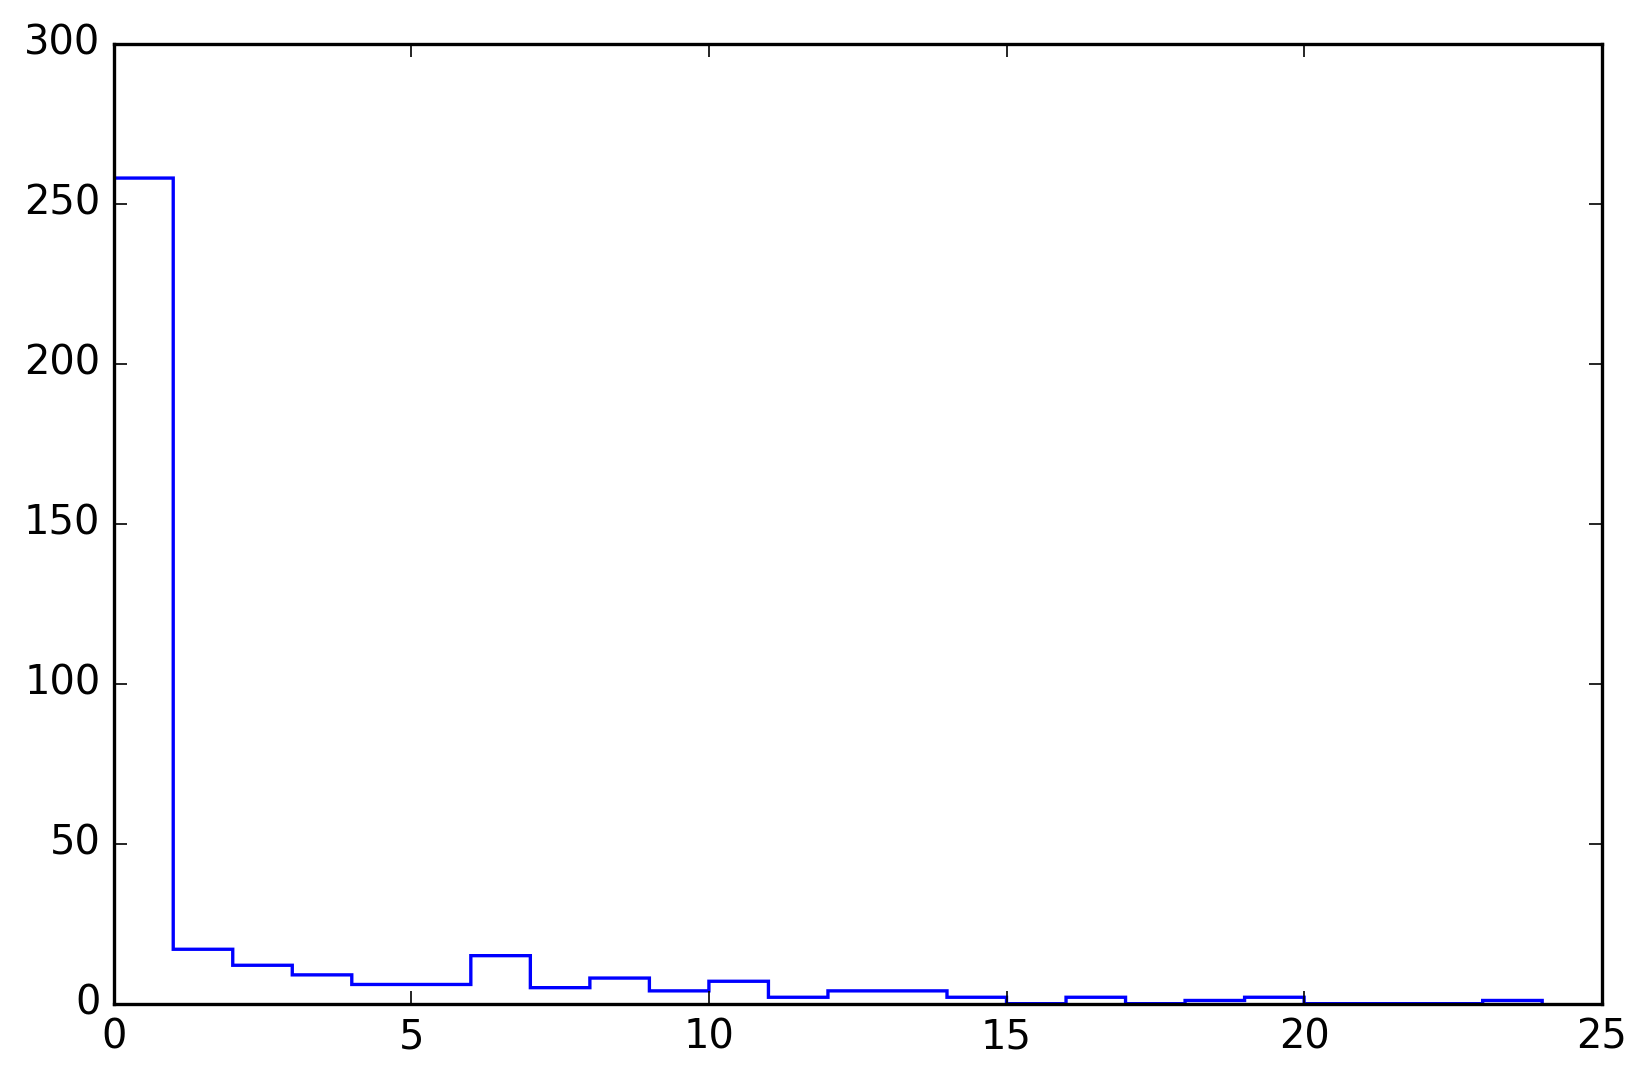

In [129]:
plt.hist(observed*24, bins=linspace(0,24,25), histtype='step');

### NOAA API V2

In [3]:
with open('noaakey.txt') as f:
    noaakey = f.read().strip()
headerkey={'token': noaakey}

In [20]:
url = 'http://www.ncdc.noaa.gov/cdo-web/api/v2/locations'
params = dict(locationcategoryid='CITY', sortfield='name', sortorder='desc', limit='1000')
req = requests.get(url, headers=headerkey, params=params)

In [21]:
data = munch.munchify(json.loads(req.content.decode('utf8')))

In [24]:
print(len(data.results))
print(*[datum for datum in data.results if 'New York' in datum.name], sep='\n')

1000
Munch({'mindate': '1872-06-01', 'maxdate': '2015-11-21', 'name': 'New York, NY US', 'datacoverage': 1, 'id': 'CITY:US360019'})


In [ ]:
NYid = 'CITY:US360019'